<a href="https://colab.research.google.com/github/zuzannazak/MgrSarcasm/blob/master/mgr_sie%C4%87_neuronowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import json
import tensorflow as tf
import requests
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LeakyReLU


#Sources that i don't want to keep looking for:
#  https://towardsdatascience.com/tensorflow-sarcasm-detection-in-20-mins-b549311b9e91
#  https://medium.com/analytics-vidhya/sarcasm-detection-with-neural-networks-1509578bb17b 
#  https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6
#  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [9]:
import csv
sentences = []
labels = []

with open('/content/drive/MyDrive/STUDIA/train-balanced.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        labels.append(row[0])
        sentences.append(row[1])

In [10]:
# Splitting the dataset into Train and Test
from sklearn.model_selection import train_test_split
training_size = round(len(sentences) * .75)
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.30, random_state=42)

In [11]:
# Setting tokenizer properties
vocab_size = 50000
oov_tok = "<oov>"

In [12]:
# Fit the tokenizer on Training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [13]:
# Setting the padding properties
max_length = 200
trunc_type='post'
padding_type='post'

In [14]:
# Creating padded sequences from train and test data
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [15]:
# Setting the model parameters
embedding_dim = 16
leaky_relu = LeakyReLU(alpha=0.01)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(50, activation=leaky_relu),
    #tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 16)           800000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                850       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 800,901
Trainable params: 800,901
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Setting the model parameters 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
embedding_dim=16
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           800000    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                102432    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [16]:
# # Training the model
num_epochs = 40
history = model.fit(np.array(training_padded), np.array(training_labels, dtype='int32'), epochs=num_epochs, validation_data=(np.array(testing_padded), np.array(testing_labels, dtype='int32')), verbose=2)




Epoch 1/40
26384/26384 - 233s - loss: 0.6034 - accuracy: 0.6706 - val_loss: 0.5682 - val_accuracy: 0.7032
Epoch 2/40
26384/26384 - 226s - loss: 0.5708 - accuracy: 0.7035 - val_loss: 0.5847 - val_accuracy: 0.6899
Epoch 3/40


KeyboardInterrupt: ignored

In [ ]:
type(training_padded)

numpy.ndarray

In [ ]:
sentence = ["Yes, definitely",
            "I like cats."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

NameError: ignored

https://medium.com/analytics-vidhya/sarcasm-detection-with-neural-networks-1509578bb17b

In [4]:
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<oov>'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(np.array(training_padded), np.array(training_labels, dtype='int32'), batch_size=256, epochs=100, validation_data=(np.array(testing_padded), np.array(testing_labels, dtype='int32')), verbose=1, callbacks=[early_stop])

Epoch 1/100
3298/3298 [==============================] - 46s 14ms/step - loss: 0.5507 - accuracy: 0.7189 - val_loss: 0.5644 - val_accuracy: 0.7066
Epoch 2/100
3298/3298 [==============================] - 46s 14ms/step - loss: 0.5461 - accuracy: 0.7223 - val_loss: 0.5692 - val_accuracy: 0.7034
Epoch 3/100
3298/3298 [==============================] - 46s 14ms/step - loss: 0.5398 - accuracy: 0.7264 - val_loss: 0.5606 - val_accuracy: 0.7095
Epoch 4/100
3298/3298 [==============================] - 47s 14ms/step - loss: 0.5337 - accuracy: 0.7305 - val_loss: 0.5636 - val_accuracy: 0.7099
Epoch 5/100
3298/3298 [==============================] - 46s 14ms/step - loss: 0.5279 - accuracy: 0.7346 - val_loss: 0.5820 - val_accuracy: 0.6983
Epoch 6/100
3298/3298 [==============================] - 45s 14ms/step - loss: 0.5223 - accuracy: 0.7376 - val_loss: 0.5735 - val_accuracy: 0.7054
Epoch 7/100
3298/3298 [==============================] - 46s 14ms/step - loss: 0.5169 - accuracy: 0.7412 - val_loss: 0

In [19]:
df_m=pd.DataFrame(model.history.history)
df_m['Epoch']=range(0,8)
df_m.index=df_m['Epoch']
df_m

,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
0,0.550680,0.718947,0.564372,0.706592,0
1,0.546096,0.722347,0.569223,0.703418,1
2,0.539850,0.726366,0.560649,0.709477,2
3,0.533747,0.730504,0.563552,0.709914,3
4,0.527911,0.734554,0.581961,0.698333,4
5,0.522322,0.737638,0.573546,0.705355,5
6,0.516904,0.741232,0.571885,0.705636,6
7,0.511752,0.744090,0.583345,0.705017,7


4398/4398 [==============================] - 7s 2ms/step - loss: 0.5833 - accuracy: 0.7050
Test accuracy: 0.7050173878669739


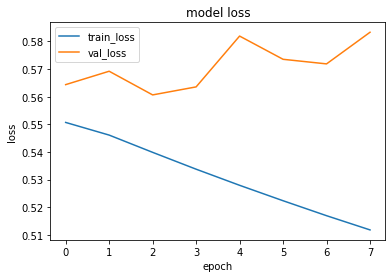

In [23]:
score = model.evaluate(np.array(testing_padded), np.array(testing_labels, dtype='int32'), batch_size=64, verbose=1)
print('Test accuracy:', score[1])

#Loss Graph(Training and Validation)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

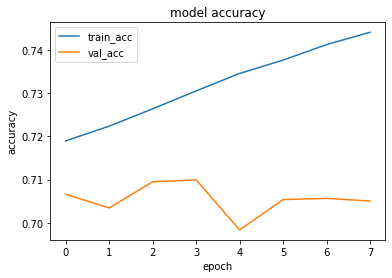

In [24]:
# Accuracy Graph(Training and Validation) 
plt.plot(df_m['accuracy'])
plt.plot(df_m['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()